<a href="https://colab.research.google.com/github/krishnakskr30/protein-protein-interaction-prediction/blob/main/Protein_Protein_Interaction_using_Residual_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

loading dataset and protein dictionary

In [ ]:
protein_dataset=open('protein.actions.txt','r')
lines=protein_dataset.readlines()

In [ ]:
protein_dict=open('protein.dictionary.txt','r')
dict_lines=protein_dict.readlines()

In [ ]:
def return_seq(pid):
  for i in dict_lines:
    lis = i.split("\t")
    if(pid == lis[0]):
      return lis[1]
    else:
      continue

In [ ]:
p1 = []
p2 = []
l = []
for ind in lines:
  lis = ind.split("\t")
  p1.append(return_seq(lis[0]))
  p2.append(return_seq(lis[1]))
  l.append(int(lis[2]))

In [ ]:
import pandas as pd
data = pd.DataFrame(list(zip(p1, p2, l)),
               columns =['protein1', 'protein2', 'label'])

In [ ]:
data

,protein1,protein2,label
0,MTITVGDAVSETELENKSQNVVLSPKASASSDISTDVDKDTSSSWD...,MSRAVGIDLGTTYSCVAHFSNDRVEIIANDQGNRTTPSYVAFTDTE...,1
1,MSFKATITESGKQNIWFRAIYVLSTIQDDIKITVTTNELIAWSMNE...,MGQLLSHPLTEKTIEYNEYKNNQASTGIVPRFYNCVGSMQGYRLTQ...,1
2,MSAKAEKKPASKAPAEKKPAAKKTSTSTDGKKRSKARKETYSSYIY...,MSLSSKLSVQDLDLKDKRVFIRVDFNVPLDGKKITSNQRIVAALPT...,1
3,MSKIDSVLIIGGSGFLGLHLIQQFFDINPKPDIHIFDVRDLPEKLS...,MSTPTAADRAKALERKNEGNVFVKEKHFLKAIEKYTEAIDLDSTQS...,1
4,MDQQAAYSTPYKKNTLSCTMSATLKDYLNKRVVIIKVDGECLIASL...,MAGAPAPPPPPPPPALGGSAPKPAKSVMQGRDALLGDIRKGMKLKK...,1
...,...,...,...
11183,MTLQRISKDYLKPNYGLILLIVSYFFNSSMVVSTKVLENDPLETSQ...,MSQKDLATKINEKPTVVNDYEAARAIPNQQVLSKLERALGVKLRGN...,0
11184,MTAMKEDNAALITLKKNNDQEKLRVHKLTDASSNSADGFVINKAKN...,MHKKKIENGRIFDLNGPTMKELLYYTFIETEVTGAFLVFREKTQNL...,0
11185,MNDWHEFNAAIKSIYCNAEGDSSSIINRLVGLAMKSEDSTFIEAVL...,MVARGRTDEISTDVSEANSEHSLMITETSSPFRSIFSHSGKVANAG...,0
11186,MSEKVNSDFEDFSSDEETDQHNVLIQTKKKISSKDDIFSKKVEDIE...,MSLTANDESPKPKKNALLKNLEIDDLIHSQFVRSDTNGHRTTRRLF...,0


#Integer Encoding

In [ ]:
codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
         'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1

  return char_dict

char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))


{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}
Dict Length: 20


In [ ]:
data

,protein1,protein2,label
0,MTITVGDAVSETELENKSQNVVLSPKASASSDISTDVDKDTSSSWD...,MSRAVGIDLGTTYSCVAHFSNDRVEIIANDQGNRTTPSYVAFTDTE...,1
1,MSFKATITESGKQNIWFRAIYVLSTIQDDIKITVTTNELIAWSMNE...,MGQLLSHPLTEKTIEYNEYKNNQASTGIVPRFYNCVGSMQGYRLTQ...,1
2,MSAKAEKKPASKAPAEKKPAAKKTSTSTDGKKRSKARKETYSSYIY...,MSLSSKLSVQDLDLKDKRVFIRVDFNVPLDGKKITSNQRIVAALPT...,1
3,MSKIDSVLIIGGSGFLGLHLIQQFFDINPKPDIHIFDVRDLPEKLS...,MSTPTAADRAKALERKNEGNVFVKEKHFLKAIEKYTEAIDLDSTQS...,1
4,MDQQAAYSTPYKKNTLSCTMSATLKDYLNKRVVIIKVDGECLIASL...,MAGAPAPPPPPPPPALGGSAPKPAKSVMQGRDALLGDIRKGMKLKK...,1
...,...,...,...
11183,MTLQRISKDYLKPNYGLILLIVSYFFNSSMVVSTKVLENDPLETSQ...,MSQKDLATKINEKPTVVNDYEAARAIPNQQVLSKLERALGVKLRGN...,0
11184,MTAMKEDNAALITLKKNNDQEKLRVHKLTDASSNSADGFVINKAKN...,MHKKKIENGRIFDLNGPTMKELLYYTFIETEVTGAFLVFREKTQNL...,0
11185,MNDWHEFNAAIKSIYCNAEGDSSSIINRLVGLAMKSEDSTFIEAVL...,MVARGRTDEISTDVSEANSEHSLMITETSSPFRSIFSHSGKVANAG...,0
11186,MSEKVNSDFEDFSSDEETDQHNVLIQTKKKISSKDDIFSKKVEDIE...,MSLTANDESPKPKKNALLKNLEIDDLIHSQFVRSDTNGHRTTRRLF...,0


In [ ]:
indep = data[['protein1','protein2']]
dep = data.label

In [ ]:
indep.shape

(11188, 2)

In [ ]:
dep.shape

(11188,)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(indep,dep,test_size = 0.3)

In [ ]:
x_train

,protein1,protein2
41,MSSSLLSVLKEKSRSLKIRNKPVKMTSQERMIVHRCRFVDFTPATI...,MSNKASDQSARTASILKTDITRENTITRSSSSNNDNYHHHNNINNY...
6270,MTQEFIDKVSSYLTPDVDIAPISQGAEAIVFTTTTHPYLPRAKDSH...,MFKLTSRLVTSRFAASSRLATARTIVLPRPHPSWISFQAKRFNSTG...
10479,MIKMWRLQIVLVPPSAQDIITFLEARLNTPQSVSPMVQYNEDIITH...,MDSASKEETLEKLVQEITVNLQKIDSNLSFCFHKITQDIIPHVATY...
1045,MSADLQQGTTNAADFSLTVLRARIALLATAIGGPDYTSQIDPPPYK...,MTKKKAATNYAERQNLASEDSSGDSVHFKDFIPLQELLKDKNYVPS...
7689,MQTPLESTDVKLDTLNEPSAHLIEKNVALPKDIFRSYLSYWIYEIA...,MLIDFCCSYIAGTHGRERAPSFTGTFVSHVSGENNCRPRRSEITQP...
...,...,...
777,MSTQSGIVAEQALLHSLNENLSADGIVIIIAKISPDSTSVHQTQVA...,MVIDLEHVVDYIMHIDSQLQLHKASPAKMNSESREDMAINSIKLLA...
7456,MGIFRWNYPESSVPGVWGETTSTIDWCEENYVVSPYIAEWSNTLTN...,MSSIHEVVALIEELYSPHPKHDVNQIQQSLQSIQKSEQGFHLANEL...
2166,MEQSNKQHRKAKEKNTAKKKLHTQGHNAKAFAVAAPGKMARTMQRS...,MSFQIETVPTKPYEDQKPGTSGLRKKTKVFKDEPNYTENFIQSIME...
2249,MSEVAPEEIIENADGSRSIITYKIEDGVKYKITQKVKEVKVLEKVH...,MSRSGVAVADESLTAFNDLKLGKKYKFILFGLNDAKTEIVVKETST...


In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
y_train

41       1
6270     0
10479    0
1045     1
7689     0
        ..
777      1
7456     0
2166     1
2249     1
8338     0
Name: label, Length: 7831, dtype: int64

In [ ]:
import numpy as np
def integer_encoding(data):
  """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
  """

  encode_list = []
  for row in data['protein1'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))

  return encode_list

pr1_train = integer_encoding(x_train)
pr1_test = integer_encoding(x_test)

In [ ]:
pr1_test

[array([11,  1, 10, 18, 16, 15, 15, 16, 17, 15, 16,  4, 16, 17, 16,  8, 17,
         9,  4,  4,  7, 17,  6,  4,  6, 16, 10, 17,  9, 10,  5,  5, 15, 19,
        10, 18, 17, 10,  4,  6,  3, 14,  3,  8, 12,  3,  6,  9,  6, 20,  8,
        16, 10, 13, 12, 18, 16, 12, 20,  8,  5,  5, 10,  6,  6, 15,  5, 15,
        17, 18,  9,  6,  1,  9, 13, 10, 19, 10,  6, 18, 10, 10,  1,  8, 18,
         2, 13, 11, 18, 10,  5, 16,  8,  5,  4,  1,  7,  9, 10, 19,  7, 17,
        14, 12,  6, 20,  9, 18, 10, 18,  8,  5,  5, 20, 20,  5, 19, 18,  8,
        17, 10,  1, 16,  5,  8, 15, 17,  1, 17, 16,  3, 13,  6, 18, 10, 13,
        15, 12,  8,  7, 10, 16, 14, 10, 15, 12, 12, 20, 14,  8, 13, 14,  4,
        20, 20, 12, 10,  8, 17, 10, 13, 17,  7, 16, 16,  8, 16,  9,  3,  8,
        17,  8,  9, 20,  2, 13, 16,  2, 15,  8, 19, 15, 13, 13, 15, 16, 16,
         7,  2, 16, 17,  2, 12, 18,  2, 18, 11, 18,  7,  3,  7,  7,  2,  8,
        19, 18, 12, 12,  2,  8,  6,  9, 15, 12, 20, 15,  5,  5, 10,  8,  5,
        10, 

In [ ]:
import numpy as np
def integer_encoding2(data):
  """
  - Encodes code sequence to integer values.
  - 20 common amino acids are taken into consideration
    and rest 4 are categorized as 0.
  """

  encode_list = []
  for row in data['protein2'].values:
    row_encode = []
    for code in row:
      row_encode.append(char_dict.get(code, 0))
    encode_list.append(np.array(row_encode))

  return encode_list

pr2_train = integer_encoding2(x_train)
pr2_test = integer_encoding2(x_test)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_length = 100
pr1_train = pad_sequences(pr1_train, maxlen=max_length, padding='post', truncating='post')
pr2_train = pad_sequences(pr2_train, maxlen=max_length, padding='post', truncating='post')
pr1_test = pad_sequences(pr1_test, maxlen=max_length, padding='post', truncating='post')
pr2_test = pad_sequences(pr2_test, maxlen=max_length, padding='post', truncating='post')


print(pr1_train.shape, pr1_test.shape)

(7831, 100) (3357, 100)


#One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

# One hot encoding of sequences
pr1_train = to_categorical(pr1_train)
pr2_train = to_categorical(pr2_train)
pr1_test = to_categorical(pr1_test)
pr2_test = to_categorical(pr2_test)
print(pr1_train.shape, pr2_test.shape)

(7831, 100, 21) (3357, 100, 21)


In [ ]:
pr1_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

#Building the model

In [ ]:

import keras
from keras.layers import Input, CuDNNGRU
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, Bidirectional, BatchNormalization, merge, add
from keras.layers.core import Flatten, Reshape
from keras.layers.merge import Concatenate, concatenate, subtract, multiply
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
def build_model():
  seq_input1 = Input(shape=(100, 21), name='seq1')
  seq_input2 = Input(shape=(100, 21), name='seq2')
  l1=Conv1D(25, 3)
  r1=Bidirectional(CuDNNGRU(25, return_sequences=True))
  l2=Conv1D(25, 3)
  r2=Bidirectional(CuDNNGRU(25, return_sequences=True))
  l3=Conv1D(25, 3)
  r3=Bidirectional(CuDNNGRU(25, return_sequences=True))
  l4=Conv1D(25, 3)
  r4=Bidirectional(CuDNNGRU(25, return_sequences=True))
  l5=Conv1D(25, 3)
  r5=Bidirectional(CuDNNGRU(25, return_sequences=True))
  l6=Conv1D(25, 3)
  s1=MaxPooling1D(2)(l1(seq_input1))
  s1=concatenate([r1(s1), s1])
  s1=MaxPooling1D(2)(l2(s1))
  s1=concatenate([r2(s1), s1])
  s1=MaxPooling1D(3)(l3(s1))
  s1=concatenate([r3(s1), s1])
  s1=l6(s1)
  s1=GlobalAveragePooling1D()(s1)
  s2=MaxPooling1D(2)(l1(seq_input2))
  s2=concatenate([r1(s2), s2])
  s2=MaxPooling1D(2)(l2(s2))
  s2=concatenate([r2(s2), s2])
  s2=MaxPooling1D(3)(l3(s2))
  s2=concatenate([r3(s2), s2])
  s2=l6(s2)
  s2=GlobalAveragePooling1D()(s2)
  merge_text = multiply([s1, s2])
  x = Dense(100, activation='linear')(merge_text)
  x = keras.layers.LeakyReLU(alpha=0.3)(x)
  main_output = Dense(1, activation='sigmoid')(x)
  merge_model = Model(inputs=[seq_input1, seq_input2], outputs=[main_output])
  return merge_model


In [ ]:
model = build_model()

In [ ]:
model1=build_model()

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 seq1 (InputLayer)              [(None, 100, 21)]    0           []                               
                                                                                                  
 seq2 (InputLayer)              [(None, 100, 21)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 98, 25)       1600        ['seq1[0][0]',                   
                                                                  'seq2[0][0]']                   
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 49, 25)       0           ['conv1d[0][0]']             

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop
adam = Adam(lr=0.001, amsgrad=True, epsilon=1e-6)
rms = RMSprop(lr=0.001)

model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

In [ ]:
model1.compile(optimizer=adam, loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
y_train

41       1
6270     0
10479    0
1045     1
7689     0
        ..
777      1
7456     0
2166     1
2249     1
8338     0
Name: label, Length: 7831, dtype: int64

#Training the model

In [ ]:
#model for affinity prediction between proteins
history = model.fit([pr1_train, pr2_train],y_train,validation_data=([pr1_test, pr2_test], y_test),batch_size = 128,epochs=50)

Epoch 1/50
62/62 [==============================] - 21s 54ms/step - loss: 0.2501 - accuracy: 0.5038 - val_loss: 0.2497 - val_accuracy: 0.5115
Epoch 2/50
62/62 [==============================] - 2s 29ms/step - loss: 0.2502 - accuracy: 0.5071 - val_loss: 0.2500 - val_accuracy: 0.4978
Epoch 3/50
62/62 [==============================] - 2s 29ms/step - loss: 0.2492 - accuracy: 0.5321 - val_loss: 0.2484 - val_accuracy: 0.5282
Epoch 4/50
62/62 [==============================] - 2s 30ms/step - loss: 0.2461 - accuracy: 0.5575 - val_loss: 0.2444 - val_accuracy: 0.5666
Epoch 5/50
62/62 [==============================] - 2s 30ms/step - loss: 0.2403 - accuracy: 0.5800 - val_loss: 0.2370 - val_accuracy: 0.5868
Epoch 6/50
62/62 [==============================] - 2s 30ms/step - loss: 0.2279 - accuracy: 0.6230 - val_loss: 0.2275 - val_accuracy: 0.6190
Epoch 7/50
62/62 [==============================] - 2s 30ms/step - loss: 0.2087 - accuracy: 0.6727 - val_loss: 0.2204 - val_accuracy: 0.6339
Epoch 8/50
6

In [ ]:
# Model for interaction prediction
history1 = model1.fit([pr1_train, pr2_train],y_train,validation_data=([pr1_test, pr2_test], y_test),batch_size = 128,epochs=50)

Epoch 1/50
62/62 [==============================] - 9s 54ms/step - loss: 0.6957 - accuracy: 0.5035 - val_loss: 0.6972 - val_accuracy: 0.4879
Epoch 2/50
62/62 [==============================] - 3s 46ms/step - loss: 0.6944 - accuracy: 0.4950 - val_loss: 0.6930 - val_accuracy: 0.4981
Epoch 3/50
62/62 [==============================] - 2s 29ms/step - loss: 0.6942 - accuracy: 0.5094 - val_loss: 0.6930 - val_accuracy: 0.4945
Epoch 4/50
62/62 [==============================] - 2s 29ms/step - loss: 0.6927 - accuracy: 0.5167 - val_loss: 0.6921 - val_accuracy: 0.5115
Epoch 5/50
62/62 [==============================] - 2s 29ms/step - loss: 0.6910 - accuracy: 0.5248 - val_loss: 0.6863 - val_accuracy: 0.5460
Epoch 6/50
62/62 [==============================] - 2s 30ms/step - loss: 0.6809 - accuracy: 0.5630 - val_loss: 0.6736 - val_accuracy: 0.5740
Epoch 7/50
62/62 [==============================] - 2s 29ms/step - loss: 0.6639 - accuracy: 0.5896 - val_loss: 0.6591 - val_accuracy: 0.5967
Epoch 8/50
62

#Saving and Loading the Models

In [ ]:
model.save('model.h5')
model1.save('model1.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
model1 = load_model('model1.h5')

#Model Evaluation

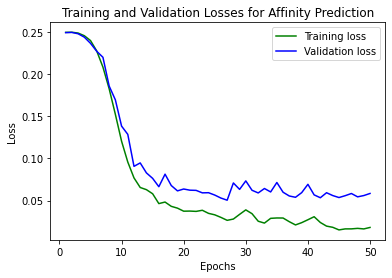

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_valid=history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_valid, 'b', label='Validation loss')

plt.title('Training and Validation Losses for Affinity Prediction')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

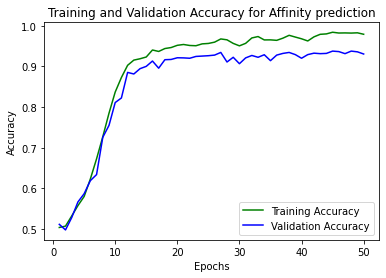

In [ ]:
acc_train = history.history['accuracy']
acc_valid=history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_valid, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy for Affinity prediction')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

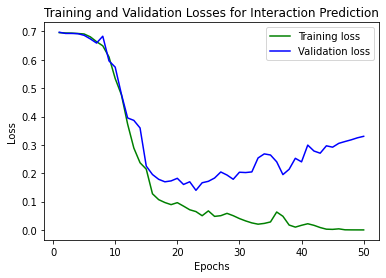

In [ ]:
loss_train = history1.history['loss']
loss_valid=history1.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_valid, 'b', label='Validation loss')

plt.title('Training and Validation Losses for Interaction Prediction')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

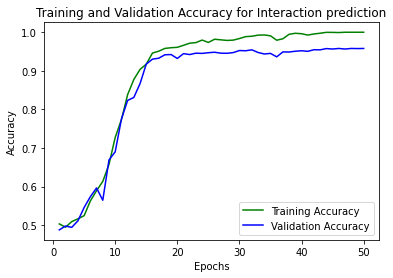

In [ ]:
acc_train = history1.history['accuracy']
acc_valid=history1.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_valid, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy for Interaction prediction')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model1.evaluate([pr1_test,pr2_test],y_test)

105/105 [==============================] - 2s 11ms/step - loss: 0.3302 - accuracy: 0.9580


[0.33020609617233276, 0.9579982161521912]

In [ ]:
pred = model1.predict([pr1_test,pr2_test])

In [ ]:
pred

array([[2.5109019e-05],
       [3.3898336e-01],
       [1.0000000e+00],
       ...,
       [3.4788127e-18],
       [1.0000000e+00],
       [1.7537433e-22]], dtype=float32)

In [ ]:
pred = [int(i > .5) for i in pred]

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
accuracy_score(pred,y_test)

0.9579982126899017

In [ ]:
cm = confusion_matrix(pred,y_test)

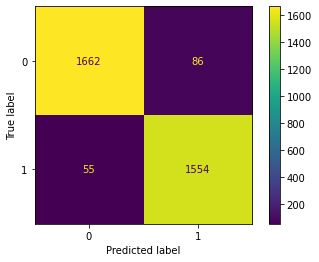

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1748
           1       0.95      0.97      0.96      1609

    accuracy                           0.96      3357
   macro avg       0.96      0.96      0.96      3357
weighted avg       0.96      0.96      0.96      3357



#Prediction on single example

In [ ]:
def predict(s1,s2):
  enc1 = []
  pred=[]
  for i in s1:
    enc1.append(char_dict.get(i, 0))
  enc1 = np.array(enc1)
  enc2 = []
  for j in s2:
    enc2.append(char_dict.get(j,0))
  enc2 = np.array(enc2)
  enc1 = pad_sequences([enc1], maxlen=max_length, padding='post', truncating='post')
  enc2 = pad_sequences([enc2], maxlen=max_length, padding='post', truncating='post')
  enc1 = to_categorical(enc1)
  enc2 = to_categorical(enc2)
  pred.append(model1.predict([enc1,enc2]))
  pred.append(model.predict([enc1,enc2]))#interacrion strength
  return pred

In [ ]:
s1 = 'MKAKPLSQDPGSKRYAYRINKEENRKELKHVKINESSLVQEGQKIDLPKKRYYRQRAHSNPFSDHQLEYPVSPQDMDWSKLYPYYKNAENGQMTKKVTIADIGCGFGGLMIDLSPAFPEDLILGMEIRVQVTNYVEDRIIALRNNTASKHGFQNINVLRGNAMKFLPNFFEKGQLSKMFFCFPDPHFKQRKHKARIITNTLLSEYAYVLKEGGVVYTITDVKDLHEWMVKHLEEHPLFERLSKEWEENDECVKIMRNATEEGKKVERKKGDKFVACFTRLPTPAIL'
s2 = 'MSIFFKPPIDIEILFDNEESRKHVDIATRSSNSSYKSMKESLPVYEDGESLGGIVTLRVRDSKKVDHLGIKVSVIGSIDMLKSHGSGNSSSKKVTSSTSSSSSNGSVDVRKNSVDQFLCQSYDLCPAGELQHSQSFPFLFRDLSKRYESYKGKNVDVAYYVKVTVMRKSTDISKIKRFWVYLYNSVTTAPNTLSANETKATTNDIAGGNYAADNASDNTQTKSTQGEAADVNQVLPISHSNNEPKPVRLDIGIENCLHIEFEYAKSQYSLKEVIVGRIYFLLTRLRIKHMELSLITRESSGLQTSNVMTDSTAIRYEIMDGSSVKGETIPIRLFLSGYDLTPNMSCNYFNVKNYLSLVIIDEDGRRYFKQSEITLYRTR'

In [ ]:
pred=predict(s1,s2)
if pred[0]>0.5:
  print('interacting')
else:
  print('not interacting')

print('The interaction strength is:')
print(pred[1])

interacting
The interaction strength is:
[[1.]]
